# Projetos de computação quântica em python

# Introdução

Nesse caderno de Jupyter simularei em phyton o comportamento de um registrador quântico inicialmente de 3 qubits e a seguir com outros números de qubits. Também simularei computações nesse registrador implementando portões quânticos como o de Hadamard e de mudança de fase que serão explicados melhor a seguir. Esse registrador quântico é construído a partir de sistemas com dois vetores de base nos seus espaços de Hilbert(um sistema quântico onde as medidas podem ter 2 resultados). Como uma partícula de spin $1/2$ por exemplo. A equação de estado geral para um sistema desse tipo é dada por $|\Psi\rangle  =  a|\uparrow\rangle  +  b|\downarrow\rangle$. Onde $|\uparrow\rangle$ e $|\downarrow\rangle$ equivalem à representação de dois estados quânticos diferentes que podem ser medidos nesse sistema ou aos autovetores do observável $S_{z}$ cujos autovalores e logo valores de medida possíveis são $\lambda = \pm \hbar/2$.  Esse observável corresponde a uma medida de spin de uma partícula no eixo $Z$ do sistema que pode ser up ou down, seta para cima ou para baixo. $a$ e $b$ são magnitudes complexas desses vetores ou amplitudes de probabilidade no jargão quântico. $|a|^{2}$ é a probabilidade de medirmos up ao realizarmos uma medida e $|b|^{2}$ e a de medirmos down. Ambas as constantes obedecem a relação de normalização $|a|^{2} + |b|^{2} = 1$ totalizando probabilidade 1. Estados genéricos $|1\rangle$ e $|0\rangle$ serão utilizados no lugar dos spins também por serem mais intuitivos se tratando de estudos a respeito de computação. 



Um registrador de N qubits equivale a um produto tensorial de N estados $|\Psi_{i}\rangle = a_{i}|0\rangle  +  b_{i}|1\rangle$ (de N partículas no caso do registrador ser implementado dessa forma). O produto tensorial de $A$ e $B$ é uma operação entre esses vetores que gera uma vetor cuja dimensão é a soma deles e cuja base é formada pela combinação das possíveis bases dos espaços dos vetores que multiplicamos. Logo a representação de um registrador quântico de 3 qubits será dada por: $|\Psi_{0}\rangle \otimes |\Psi_{1}\rangle \otimes |\Psi_{2}\rangle$ ou $|\Psi_{0}\Psi_{1}\Psi_{2}\rangle$.  As bases do estado resultado desse produto são dadas pela combinação de produtos tensoriais das bases de um estado de um único qubit. E o resultado da medida de um qubit dessa base seria o de cada qubit nesse vetor. $|001\rangle$ então resultaria numa medida $S_{z}$ de $-\hbar/2$ (0) para o primeiro qubit, $-\hbar/2$ para o segundo e $+\hbar/2$ (1) para o terceiro. $|\Psi_{0}\Psi_{1}\Psi_{2}\rangle = |\Psi\rangle$ é uma combinação linear de 8 estados diferentes dada por: $a|000\rangle + b|001\rangle + \ldots+ g|110\rangle + h|111\rangle$. Onde o vetor $[a, b, c, d, e, f, g, h]$ corresponde às amplitudes de probabilidade complexas de cada vetor nesse espaço.



***
#  Projeto 1:
Medida de um registrador de N-qubits. Nesse caderno usaremos um registrador de 3 qubits com função de onda $|\Psi\rangle$ representada por Psi no programa. 

Código das funções utilizadas e imports:

In [4]:
%matplotlib inline
import math 
import random       #para gerar um numero aleatorio na medida
from matplotlib import pyplot as plt    #para plotar o grafico da medida
import numpy as np

#seta o vetor psi em um estado de base dado na entrada
def seta_base(Psi, estado):
    count=0
    Psi[estado]=1
    for c in Psi:    #passa o loop pelo vetor Psi 
        if count != estado:
            Psi[count]=0
        count=count+1   #enumera os componentes de psi
        
#dado um vetor psi de amplitudes de probabilidade de um sitema de bits quanticos com numero arbitrario de bits. Simula uma medida colapsando psi para um dos seus componentes, seguindo a distribuicao de probabilidade adequada.
def medir(Psi):
    r=random.random()   #r recebe um numero aleatorio float de 0 ate 1
    q=0
    count=0
    for c in Psi:       #esse loop vai somando as probabilidades da medida colapsar para algum componente de psi ate r estar contido no intervalo de 0 ate q
        q=q+abs(c)**2   #q recebe o valor absoluto da amplitude de probabilidade desse componente de psi
        if q >r:
            break
        count=count+1   #enumera os componentes de psi
    return count



#mede a funcao de onda Psi n vezes e imprime o grafico com a frequencia de obtencao de cada resultado de medida
#qubits e o numero de qubits
def medir_n(Psi, n, qubits):
    medidas=[0 for c in Psi]
    i=0
    while i<n:
        i=i+1
        resultado=medir(Psi)
        medidas[resultado]=medidas[resultado]+1

    plt.xlabel('Resultado')
    plt.ylabel('Numero de medidas')
    plt.title('Medidas')
    
    index=np.arange(2**qubits) #index de numeros inteiros com numero de resultados possiveis
    rotulo=[bin(c)[2:].zfill(qubits) for c in index] #cria um vetor com rotulos em binario para o eixo x
    plt.xticks(index, rotulo)   #para o grafico usar os rotulos
    plt.bar(np.arange(2**qubits), medidas) #plota o grafico


## 1-Estado de base:
Psi está agora no estado base $|\Psi\rangle = |101\rangle$ (5 em binário)

In [7]:
Psi=[0, 0, 0, 0, 0, 0, 0, 0] 
seta_base(Psi, 5) 
print(Psi)

[0, 0, 0, 0, 0, 1, 0, 0]


Realizamos a seguir uma medida no estado de Psi sem colapsar a função de onda. Para colapsar a função basta usar seta_base com o resultado da medida como segundo parâmetro.


In [8]:
resultado=medir(Psi)

Resultado em binário

In [9]:
bin(resultado)[2:].zfill(3) 

'101'

Plota um gráfico para 100 medidas do estado $|\Psi\rangle$.

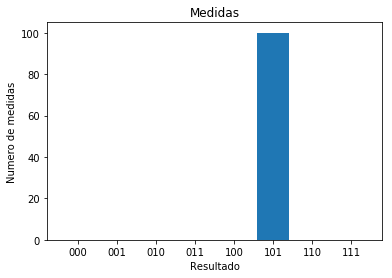

In [230]:
medir_n(Psi, 100, 3)

## 2-Estado de gato: 
A variável 'a' esta com o valor da raiz de 2 sobre 2 para duas das amplitudes de probabilidade

In [231]:
a=1/math.sqrt(2)    

Psi aqui está no estado de gato $|\Psi\rangle = \frac{1}{\sqrt{2}}|000\rangle + \frac{1}{\sqrt{2}}|111\rangle$ com uma superposição entre os dois estados  $|000\rangle$ e $|111\rangle$. Logo ambos têm probabilidades iguais de medida do sistema e enquanto não há nenhuma medida o 'gato está vivo e morto ao mesmo tempo'.


In [232]:
Psi=[a, 0, 0, 0, 0, 0, 0, a] 

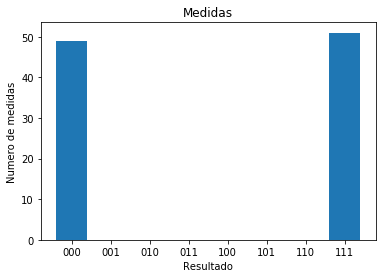

In [233]:
medir_n(Psi, 100, 3)

## 3-Superposição igual de todos os estados:
Aqui Psi está em uma superposição de todos os resultados de medida possíveis para o registrador: $|\Psi\rangle = \frac{1}{\sqrt{8}}|000\rangle + \frac{1}{\sqrt{8}}|001\rangle + \ldots+ \frac{1}{\sqrt{8}}|110\rangle + \frac{1}{\sqrt{8}}|111\rangle$. Logo podemos medir qualquer valor para qualquer qubit sem nenhuma correlação entre eles.


In [234]:
a=1/math.sqrt(8)    
Psi=[a, a, a, a, a, a, a, a] 


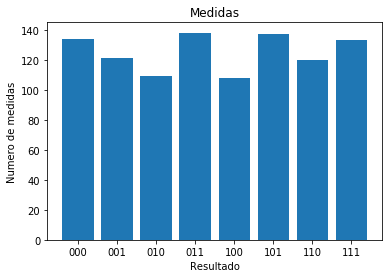

In [235]:
medir_n(Psi, 1000, 3)

***
#  Projeto 2:
Nesse projeto veremos a aplicação de portas que afetam um único qubit que são a porta de Hadamard e a de mudança de fase. 

In [24]:
from sympy import I, Matrix, symbols            #para os produtos de tensores
from sympy.physics.quantum import TensorProduct #para operar gates em registradores com varios bits
import math
import cmath
from sympy.matrices import *

def tensorNqubits(portao, alvo, qubits): #muda o portao de 1 bit para um de N qubits no alvo a escolha
    i=0
    alvo=alvo-1
    while i < alvo: #faz produtos tensoriais para os qubits anteriores ao alvo
        portao=TensorProduct(eye(2), portao) 
        i = i + 1
    i=0
    while i < qubits - alvo - 1: #faz produtos tensoriais para os qubits posteriores ao alvo
        portao=TensorProduct(portao, eye(2)) 
        i = i + 1
    return portao 

#aplica o operador de hadamard no qubit alvo de Psi
def hadamard(Psi, alvo, qubits):
    
    h1q=ones(2) #faz uma matriz 2x2 portao de hadamard para 1 qubit
    h1q[1,1]=-1
    
    had=tensorNqubits(h1q, alvo, qubits)
    
    psi=np.matrix(Psi)  #para poder multiplicar o vetor de estado pelo operador
    
    a=1/math.sqrt(2)
    psi=psi*had*a         #opera a multiplicacao de matrizes mais o fator a que normaliza a matriz do portao de hadamard
    
    return psi.tolist()[0] #transforma a matriz de volta em lista

#retorna o estado Psi com o portao de mundanca de fase aplicado no qubit alvo
def muda_fase(Psi, alvo, fase, qubits):
    
    p1q=eye(2) #faz uma matriz 2x2 portao de hadamard para 1 qubit
    p1q[1,1]=cmath.exp( complex(0, fase) )
    
    phase=tensorNqubits(p1q , alvo, qubits)
    
    psi=np.matrix(Psi)  #para poder multiplicar o vetor de estado pelo operador
    
    psi=psi*phase         #opera a multiplicacao de matrizes mais o fator a que normaliza a matriz do portao de hadamard
    
    return psi.tolist()[0] #transforma a matriz de volta em lista


## Hadamard
A porta de Hadamard para 1 qubit é dada pela matriz:
    $$
    \frac{1}{\sqrt{2}} \begin{pmatrix}
    1 & 1\\
    1 & -1 
    \end{pmatrix}$$
Num vetor em estado base $|0\rangle$ ela distribui a amplitude de probabilidade (escalar complexo que multiplica os componentes) entre os dois estados igualmente. No vetor $|1\rangle$ ela faz o mesmo só que com um sinal negativo na amplitude do estado $|1\rangle$.

In [238]:
qubit=[1,0]
qubit=hadamard(qubit, 1, 1)
print(qubit)

[0.707106781186547, 0.707106781186547]


In [239]:
qubit=[0,1]
qubit=hadamard(qubit, 1, 1)
print(qubit)

[0.707106781186547, -0.707106781186547]


## Mudança de fase
A porta de mundança de uma fase $\theta$ para 1 qubit é dada pela matriz:
    $$
     \begin{pmatrix}
    1 & 0\\
    0 & e^{\theta i} 
    \end{pmatrix}$$
Ou seja ela mantém o componente do vetor-qubit $|0\rangle$ e coloca uma fase complexa no componente $|1\rangle$ preservando os módulos e logo as probabilidades. Isso parece não fazer diferença já que a medida é a mesma mas aplicando outras portas como veremos no quarto experimento vemos os efeitos da fase nas nossas computações.

[1, 0]


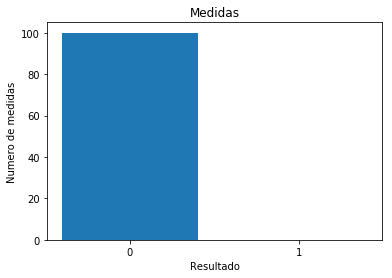

In [240]:
qubit=[1,0]
qubit=muda_fase(qubit, 1, math.pi/2, 1)
print(qubit)
medir_n(qubit, 100, 1)

[0, 6.12323399573677e-17 + 1.0*I]


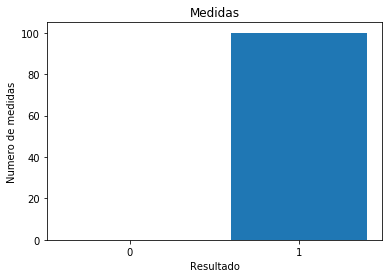

In [241]:
qubit=[0,1]
qubit=muda_fase(qubit, 1, math.pi/2, 1)
print(qubit)
medir_n(qubit, 100, 1)

[0, 0.707106781186548 - 0.707106781186547*I]


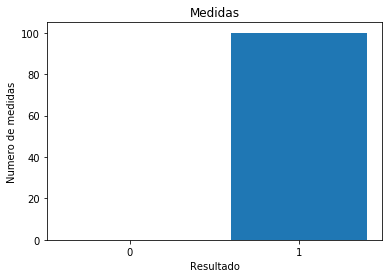

In [242]:
qubit=[0,1]
qubit=muda_fase(qubit, 1, -math.pi/4, 1)
print(qubit)
medir_n(qubit, 100, 1)

## Experimentos

Aqui faremos experimentos com 3 qubits e as portas. Aplicaremos os gates no vetor de estado base com todos os qubits em 0 para os experimentos, $\Psi = |000\rangle$.

In [243]:
Psi=[0,0,0,0,0,0,0,0]
seta_base(Psi, 0)
print(Psi)

[1, 0, 0, 0, 0, 0, 0, 0]


## 1-Hadamard no segundo bit 
Representado por: $H^{(2)}|000\rangle$ na notação de bra-ket ou Dirac. 

Trata-se de um simples Hadamard em 1 qubit como visto anteriormente. Mas para usá-lo em três qubits precisamos fazer um ajuste na dimensão da matriz que faz a operação. Para uma porta que opera apenas um qubit basta fazer produtos tensoriais  $H^{(2)} = I \otimes H \otimes I$ com matrizes identidade. As matrizes indentidade são colocadas no lugar dos qubits que não sofrem a operação e a porta desejada no lugar do qubit que se deseja operar. 
Logo $H^{(3)} = I \otimes I \otimes H$ assim como $H^{(1)} = H \otimes I \otimes I$

![title](img/proj2h1.png)


[0.707106781186547, 0, 0.707106781186547, 0, 0, 0, 0, 0]


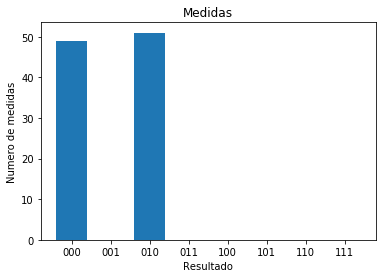

In [244]:
Psi=[0]*8
seta_base(Psi, 0)
Psi=hadamard(Psi, 2, 3)
print(Psi)
medir_n(Psi, 100, 3)

## 2-Três Hadamards, um para cada bit 
$H^{(3)}H^{(2)}H^{(1)}|000\rangle$ 
O Hadamard afeta cada qubit independentemente e faz com que tenham probabilidades iguais de obtermos 0 ou 1 logo aqui o resultado da operação é obter qualquer medida do registrador com igual probabilidade.

![title](img/proj2h2.png)

[0.707106781186547, 0, 0, 0, 0.707106781186547, 0, 0, 0]
[0.500000000000000, 0, 0.500000000000000, 0, 0.500000000000000, 0, 0.500000000000000, 0]
[0.353553390593274, 0.353553390593274, 0.353553390593274, 0.353553390593274, 0.353553390593274, 0.353553390593274, 0.353553390593274, 0.353553390593274]


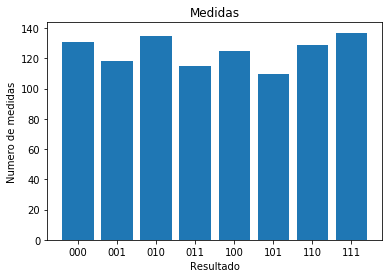

In [245]:
Psi=[0]*8
seta_base(Psi,0)
Psi=hadamard(Psi, 1, 3)
print(Psi)
Psi=hadamard(Psi, 2, 3)
print(Psi)
Psi=hadamard(Psi, 3, 3)
print(Psi)
medir_n(Psi, 1000, 3)

## 3-Dois Hadamards no terceiro bit
$H^{(3)}H^{(3)}|000\rangle$
Aplicando um Hadamard no mesmo qubit uma segunda vez revertemos o seu efeito. (vemos que a matriz de hadamard é a própria inversa)

![title](img/proj2h3.png)

[0.707106781186547, 0.707106781186547, 0, 0, 0, 0, 0, 0]
[1.00000000000000, 0, 0, 0, 0, 0, 0, 0]


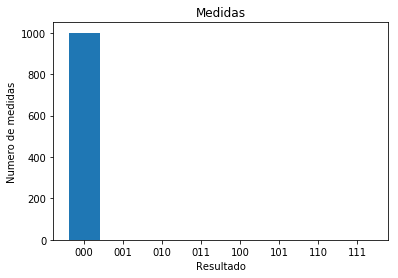

In [246]:
Psi=[0]*8
seta_base(Psi,0)
Psi=hadamard(Psi, 3, 3)
print(Psi)
Psi=hadamard(Psi, 3, 3)
print(Psi)
medir_n(Psi, 1000, 3)

## 4-Dois Hadamards no terceiro bit e uma mundança de fase de $\pi$ entre eles 
$H^{(3)}R_\pi^{(3)}H^{(3)}|000\rangle$
Aqui aplicamos um portão de hadamard no qubit 3 do registrador e em seguida mudamos a fase da componente $|1\rangle$ em um ângulo de $\pi$ (o que inverte o sinal da componente) no mesmo qubit. Esse ultimo portão não alteraria a medida final mas aplicando um novo Hadamard vemos que mudamos o estado do qubit 3 de $|0\rangle$ para $|1\rangle$ com esses três portões. Isso ocorre porque o Hadamard de $|0\rangle$ é $H|0\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle $ e o de $|1\rangle$ é $H|1\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle$ logo o Hadamard do Hadamard de $|0\rangle$ com o sinal de $|1\rangle$ invertido é: $ H(\frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle)= HH|1\rangle=|1\rangle$


![title](img/proj2h4.png)

[0.707106781186547, 0.707106781186547, 0, 0, 0, 0, 0, 0]
[0.707106781186547, -0.707106781186547 + 8.65956056235493e-17*I, 0, 0, 0, 0, 0, 0]
[6.12323399573676e-17*I, 1.0 - 6.12323399573676e-17*I, 0, 0, 0, 0, 0, 0]


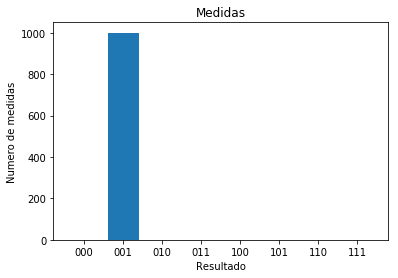

In [10]:
Psi=[0]*8
seta_base(Psi,0)
Psi=hadamard(Psi, 3, 3)
print(Psi)
Psi=muda_fase(Psi, 3, math.pi, 3)
print(Psi)
Psi=hadamard(Psi, 3, 3)
print(Psi)
medir_n(Psi, 1000, 3)

***
# Projeto 3
Nesse projeto veremos um exemplo de computação quântica com o algoritimo de busca de Groover. Esse algoritmo é notável porque a base de dados precisa ser consultada para encontrar o valor em média $\frac{\pi}{4}\sqrt{n}$ vezes ao invés de $\frac{n}{2}$ que seria de uma busca com um computador clássico. Isso significaria uma redução no tempo de busca bem significativa para bases de dados grandes.

No entanto a lista precisaria ser armazenada na forma de um oraculo quântico. Um oraculo quântico aceitaria superposições de consultas à lista retornando uma superposição de respostas. Todavia para obter essa resposta com uma medida acabariamos colapsando a função de onda fazendo com que não pudessemos analisar a superposição para obter a resposta. Mas Groover obteve uma maneira de operar essa função de onda para que ela colapse para a resposta correta a maioria das vezes. Que é o operador de difusão de Groover.

In [3]:

#operador de difusao de Groover
def bloco_groover (psi, qubits, resposta):
    
    #oraculo##################################################
    psi[resposta]=-psi[resposta]  #muda o sinal da amplitude da resposta correta
    
    #operador de difusao de groover###########################
    #loop para fazer hadamard em todos os qubits
    count=1
    while count <= qubits:    
        psi=hadamard(psi, count, qubits) #hadamard em todos os qubits
        count = count + 1
        
    #Operador J (matriz identidade com primeiro elemento da diagonal -1)
    psi[0]=-psi[0] 
    
    #hadamard em todos os qubits de novo
    count=1
    while count <= qubits:
        psi=hadamard(psi, count, qubits)
        count = count + 1
    return psi

O oráculo quântico é dado por uma matriz identidade para operar o número desejado de qubits com o 1 equivalente à resposta com o sinal invertido. Exemplo para dois qubits e com a resposta como estado $|10\rangle$:
$$
   O=\begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & -1 & 0\\
    0 & 0 & 0 & 1
    \end{pmatrix}$$

O oráculo é um operador quântico pois é uma matriz unitária (cuja conjugada hermitiana é a inversa da mesma) e ele inverte o sinal apenas do componente equivalente a resposta. Logo se a resposta procurada for $|10\rangle$ o oráculo dela é $O|10\rangle=-|10\rangle$. Enquanto o oraculo de outro estado conserva a amplitude dele. E de uma função psi com quatro estados possíveis é $O|\Psi\rangle = O(a|00\rangle+b|01\rangle+c|10\rangle+d|11\rangle)=a|00\rangle+b|01\rangle-c|10\rangle+d|11\rangle$

O resto do circuito é o operador de difusão de Groover. Ele que faz com que a alteração do oráculo no estado do registrador quântico seja mensurável. Ele consiste de portões de Hadamard em todos os qubits seguidos de um operador $J$ que inverte o sinal do estado de $|00\rangle$ da mesma maneira que o oráculo mas sempre nesse estado seguido de mais portôes de Hadamard em todos os qubits. O oráculo mais o operador de difusão devem ser repetidos $(\pi/4)\sqrt{2^N}$ vezes arrendodado para um inteiro onde N é o número de qubits. Para três qubits que usaremos isso resulta em $2.22$ arredondado para 2 blocos.

![title](img/proj3.png)

Logo para 3 qubits o nosso circuito de computação quântica ficará assim:
$(H^{(1, 2, 3)} J H^{(1, 2, 3)} O)^2 H^{(1, 2, 3)}|000\rangle$ 
Abaixo temos o código que executa essa operação. Nota-se que obtemos muito mais que 90% de chance de obter o como resultado a nossa resposta no caso o número 6, $|110\rangle$ em binário. Assim como para outros valores e com número de blocos de difusão diferentes.

[-0.0883883476483183, -0.0883883476483183, -0.0883883476483183, -0.0883883476483183, -0.0883883476483184, -0.0883883476483183, 0.972271824131501, -0.0883883476483183]


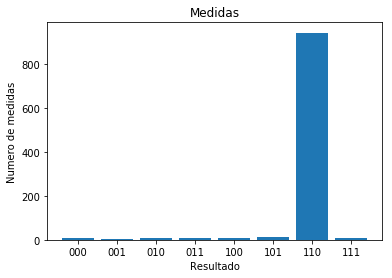

In [8]:
Psi=[1,0,0,0,0,0,0,0]

count=1
while count <= 3:    #passa o loop pelo vetor psi
    Psi=hadamard(Psi, count, 3) #hadamard em todos os qubits
    count = count + 1

resposta=6

#blocos do operador de difusao de groover
Psi=bloco_groover(Psi, 3, resposta)
Psi=bloco_groover(Psi, 3, resposta)

print(Psi)
medir_n(Psi, 1000, 3)

[-0.0883883476483183, -0.0883883476483184, -0.0883883476483183, 0.972271824131501, -0.0883883476483183, -0.0883883476483183, -0.0883883476483183, -0.0883883476483183]


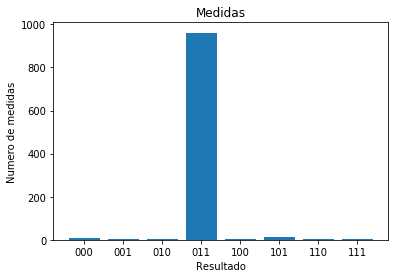

In [250]:
Psi=[1,0,0,0,0,0,0,0]

count=1
while count <= 3:    #passa o loop pelo vetor psi
    Psi=hadamard(Psi, count, 3) #hadamard em todos os qubits
    count = count + 1

resposta=3
    
    
#blocos do operador de difusao de groover
Psi=bloco_groover(Psi, 3, resposta)
Psi=bloco_groover(Psi, 3, resposta)

print(Psi)
medir_n(Psi, 1000, 3)

[-0.176776695296637, -0.176776695296637, -0.883883476483184, -0.176776695296637, -0.176776695296637, -0.176776695296637, -0.176776695296637, -0.176776695296637]


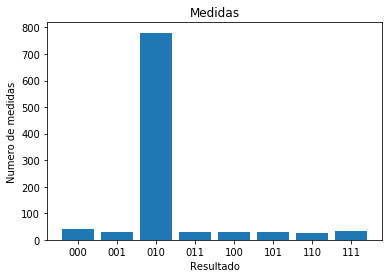

In [251]:
Psi=[1,0,0,0,0,0,0,0]

count=1
while count <= 3:    #passa o loop pelo vetor psi
    Psi=hadamard(Psi, count, 3) #hadamard em todos os qubits
    count = count + 1

resposta=2
    
    
#blocos do operador de difusao de groover
Psi=bloco_groover(Psi, 3, resposta)

print(Psi)
medir_n(Psi, 1000, 3)

[0.309359216769114, 0.309359216769114, 0.309359216769114, 0.309359216769114, 0.309359216769114, 0.309359216769114, 0.309359216769114, -0.574524259714069]


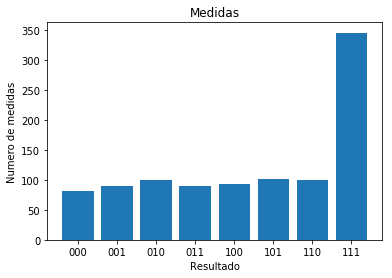

In [252]:
Psi=[1,0,0,0,0,0,0,0]

count=1
while count <= 3:    #passa o loop pelo vetor psi
    Psi=hadamard(Psi, count, 3) #hadamard em todos os qubits
    count = count + 1

resposta=7
    
    
#blocos do operador de difusao de groover
Psi=bloco_groover(Psi, 3, resposta)
Psi=bloco_groover(Psi, 3, resposta)
Psi=bloco_groover(Psi, 3, resposta)

print(Psi)
medir_n(Psi, 1000, 3)

***
# Projeto 4
Portões CNOT. Portões CNOT são portas quânticas NOT (ou NÃO) controladas e funcionam da seguinte maneira: Há um qubit controlador e um qubit que sofre a operação NOT. Se e somente se o qubit controlador é $|1\rangle$ que o outro qubit é invertido de $|1\rangle$ para $|0\rangle$ ou de $|0\rangle$ para $|1\rangle$. Se o controlador for $|0\rangle$ o controlado mantém o seu estado. O qubit controlador não é alterado.

In [12]:
#cnot de 3 quibts com o qubit 2 como controlador
def cnot3(psi, qubit_negado):
    #matriz e produto tensorial se o bit negado for o 1
    if qubit_negado == 1:
        cnotm2= Matrix([[1, 0, 0, 0], #matriz de 2 qubits onde primeiro controla o posterior
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]])
        cnot=TensorProduct(cnotm2, eye(2))#produto tensorial para operar 3 qubits
        
    #matriz e produto tensorial se o bit negado for o 3
    else:
        cnotm2= Matrix([[1, 0, 0, 0], #matriz de 2 qubits onde um qubit controla o anterior
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]])
        cnot=TensorProduct(eye(2), cnotm2)#produto tensorial para operar 3 qubits
    
    psi=np.matrix(psi)  #para poder multiplicar o vetor de estado pelo operador
    
    psi=psi*cnot       #opera a multiplicacao de matrizes
    
    return psi.tolist()[0] #transforma a matriz de volta em lista
    


## 1-Emaranhamento quântico

Com a porta CNOT podemos emaranhar dois ou mais qubits fazendo com que haja uma correlação nas medidas deles. No caso sempre que medirmos $|1\rangle$ no qubit 2 sempre mediremos $|1\rangle$ no qubit 3 e o mesmo para zero.

O circuito é dado por $C_{NOT}^{(2,3)}H^{(2)}|000\rangle$ Onde $C_{NOT}^{(2,3)}$ é um CNOT contolado pelo qubit 2 no qubit 3.

![title](img/proj5c1.png)

[0.707106781186547, 0, 0, 0.707106781186547, 0, 0, 0, 0]


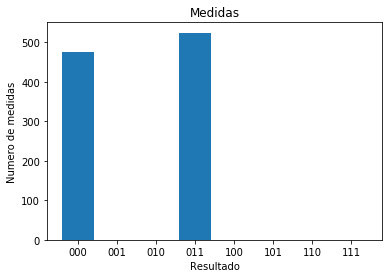

In [12]:
Psi=[0]*8
seta_base(Psi,0)

#hadamard no segundo qubit para coloca-lo numa superposição
Psi=hadamard(Psi, 2, 3)  
#CNOT para emaranhar os qubits
Psi=cnot3(Psi, 3)

print(Psi)
medir_n(Psi, 1000, 3)

Note como o qubit 1 sempre é zero pois estava em $|0\rangle$ e o segundo e terceiro qubit sempre são iguais. Além disso as probabilidades são de $0.5$ pois o segundo qubit que é o controlador estava em superposição com um portão de Hadamard.

## 2-Estado de gato
Aqui usamos as portas CNOT para colocar o registrador quântico no estado de gato a partir do estado base $|000\rangle$. Que é metade de chance de estar zerado completamente ou metade com todos os qubits em 1. Ou $|\Psi\rangle = \frac{1}{\sqrt{2}}|000\rangle + \frac{1}{\sqrt{2}}|111\rangle$ como já explicado no primeiro projeto.
O circuito é colocado em notação de Dirac da seguinte maneira:
$C_{NOT}^{(2,1)} C_{NOT}^{(2,3)}H^{(2)}|000\rangle$
Nesse caso os três qubits estão emaranhados.

![title](img/proj5c2.png)

In [ ]:
Psi=[0]*8
seta_base(Psi,0)

#hadamard no segundo qubit para coloca-lo numa superposição
Psi=hadamard(Psi, 2, 3)  
#CNOTs para emaranhar os qubits
Psi=cnot3(Psi, 3)
Psi=cnot3(Psi, 1)

print(Psi)
medir_n(Psi, 1000, 3)

## 3-Superposição observada
Aqui usaremos os portões CNOT para demostrar o fenomeno quântico de uma superposição colapsar quando é observada. Usamos um portão de Hadamard para colocar o qubit em uma superposição e outro para fazê-lo voltar ao seu estado original ou seja $|000\rangle$. No entanto na segunda vez que executamos o experimento colocamos uma porta CNOT entre os Hadamards para que o qubit 3 mude de estado dependendo de "qual estado o qubit 2 estaria na superposição".


![title](img/proj5c3.png)

[0.707106781186547, 0, 0.707106781186547, 0, 0, 0, 0, 0]
[1.00000000000000, 0, 0, 0, 0, 0, 0, 0]


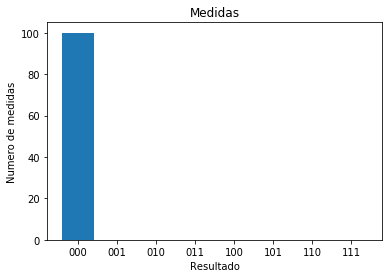

In [22]:
Psi=[0]*8
seta_base(Psi,0)

#hadamard no segundo qubit para coloca-lo numa superposição
Psi=hadamard(Psi, 2, 3)  
print(Psi)
#qubit emaranhado

Psi=hadamard(Psi, 2, 3) 
#qubit de volta ao estado original
print(Psi)
medir_n(Psi, 100, 3)

Agora observamos o estado da superposição.

![title](img/proj5c4.png)

[0.707106781186547, 0, 0.707106781186547, 0, 0, 0, 0, 0]
[0.707106781186547, 0, 0, 0.707106781186547, 0, 0, 0, 0]
[0.500000000000000, 0.500000000000000, 0.500000000000000, -0.500000000000000, 0, 0, 0, 0]


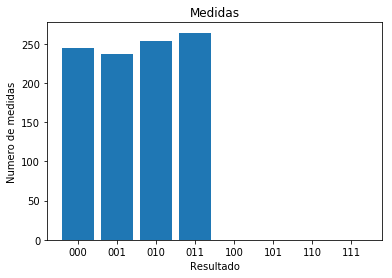

In [260]:
seta_base(Psi,0)

#hadamard no segundo qubit para coloca-lo numa superposição
Psi=hadamard(Psi, 2, 3)  
print(Psi)

#CNOT para 'observar' o qubit
Psi=cnot3(Psi, 3)
print(Psi)

#qubit de volta ao estado original
Psi=hadamard(Psi, 2, 3) 
print(Psi)
medir_n(Psi, 1000, 3)

Ao invès de voltarmos ao estado original os 2 qubits entraram em um estado de superposição sem corelação entre eles demostrando que a observação de um estado de superposição destroí a mesma.

***
# Projeto 5 e 6
Nesses projetos refazeremos o algoritmo de Groover mas aumentando o número de qubits até atinjir a capacidade máxima do meu computador. No projeto 6 usaremos matrizes exparsas para aumentar essa capacidade.  

In [7]:
qubits=5
resposta=7
Psi=[0]*2**qubits
seta_base(Psi,0)
count=1
while count <= qubits:    #passa o loop pelo vetor psi
    Psi=hadamard(Psi, count, qubits) #hadamard em todos os qubits
    count = count + 1

#blocos do operador de difusao de groover
count=1
while count <= round(math.pi/4*math.sqrt(2**qubits)):    #passa o loop pelo vetor psi
    Psi=bloco_groover(Psi, qubits, resposta)
    count = count + 1

print("done")
#medir_n(Psi, 10, qubits)

done


Tabela dos tempos de execução (user time) em um computador linux Ubuntu Intel® Core™ i5-4210U CPU @ 1.70GHz × 4 do código acima implementado num arquivo com as declarações das funções de Hadamard e as outras até agora utilizadas:



|qubits | tempo|
|-------|------|
|1 | 1.20s|
|2 | 1.15s|
|3 | 1.36s|
|4 | 3.51s|
|5 | 29.33s|
|6 | 353.69s|

O comando abaixo foi utilizado para aferir os tempos:

_\time -v python projeto5.py_

Vemos a partir da tabela que o tempo de execução cresce exponencialmente de acordo com as matrizes que precisamos para simular os qubits e têm tamanho $2^{N}$. Vemos também que há um overhead que no caso é a parte do tempo de execução que não aumenta com o número de qubits como por exemplo o tempo para carregar as funções na memória. Ele tem aproximandamente 1s pois o tempo de execuçaõ para 1 qubit até 3 qubits é semelhante.

Se meu código alocasse as matrizes das portas de início na memória e as reutiliza-se, pois há portas de Hadamard repetidas inúmeras vezes, seria muito mais eficiente. Com um pouco de perdas na simplicidade do mesmo. Outro modo de aumentar a eficiência além de poupar o uso de memória é usando matrizes exparsas. Fazendo com que não seja necessário armazenar e fazer contas com os zeros das matrizes que ocupam grande parte delas no nosso caso. Uma matriz de uma porta de hadamard em 1 qubit tem apenas dois elementos diferentes de zero por linha. Em uma matriz para operar 7 qubits por exemplo isso são $2/2^7=1/2^6=1/64$ elementos não nulos para cada zero na matriz o que é uma baixissima densidade. Essa densidade só diminui com o número de qubits.


## Projeto 6 - matrizes exparsas

Foi utilizado o seguinte código para implementar as matrizes exparsas num arquivo que pudesse ser usado com o comando:

_\time -v python projeto6.py_

In [8]:
import math 
import cmath
import scipy.sparse as scp


def sp_tensorNqubits(portao, alvo, qubits): #muda o portao de 1 bit para um de N qubits no alvo a escolha
    i=0
    alvo=alvo-1
    while i < alvo: #faz produtos tensoriais para os qubits anteriores ao alvo
        portao=scp.kron(scp.eye(2), portao) 
        i = i + 1
    i=0
    while i < qubits - alvo - 1: #faz produtos tensoriais para os qubits posteriores ao alvo
        portao=scp.kron(portao, scp.eye(2)) 
        i = i + 1
    return portao 

#aplica o operador de hadamard no qubit alvo de Psi
def sp_hadamard(Psi, alvo, qubits):
    
    h1q=scp.csr_matrix( #faz uma matriz 2x2 portao de hadamard para 1 qubit
   [[1, 1],
     [1, -1]])

    had=sp_tensorNqubits(h1q, alvo, qubits)
    
    psi=scp.csr_matrix(Psi)  #para poder multiplicar o vetor de estado pelo operador
    
    a=1/math.sqrt(2)
    psi=psi*had*a         #opera a multiplicacao de matrizes mais o fator a que normaliza a matriz do portao de hadamard
    return psi #transforma a matriz de volta em lista

#retorna o estado Psi com o portao de mundanca de fase aplicado no qubit alvo



#operador de difusao de Groover
def sp_bloco_groover (psi, qubits, resposta):
    
    #oraculo##################################################
    psi[0, resposta]=-psi[0, resposta]  #muda o sinal da amplitude da resposta correta
    
    #operador de difusao de groover###########################
    #loop para fazer hadamard em todos os qubits
    count=1
    while count <= qubits:    
        psi=sp_hadamard(psi, count, qubits) #hadamard em todos os qubits
        count = count + 1
        
    #Operador J (matriz identidade com primeiro elemento da diagonal -1)
    psi[0,0]=-psi[0, 0] 
    
    #hadamard em todos os qubits de novo
    count=1
    while count <= qubits:
        psi=sp_hadamard(psi, count, qubits)
        count = count + 1
    return psi





In [8]:

qubits=input()
resposta=1

Psi=[0]*2**qubits
Psi[0]=1

count=1
while count <= qubits:    #passa o loop pelo vetor psi
        Psi=sp_hadamard(Psi, count, qubits) #hadamard em todos os qubits
        count = count + 1

#blocos do operador de difusao de groover
count=1
while count <= round(math.pi/4*math.sqrt(2**qubits)):    #passa o loop pelo vetor psi
        Psi=sp_bloco_groover(Psi, qubits, resposta)
        count = count + 1
print(Psi)
print("done")



 4


  (0, 7)	0.05078125
  (0, 6)	0.05078125
  (0, 5)	0.05078125
  (0, 4)	0.05078125
  (0, 3)	0.05078125
  (0, 2)	0.05078125
  (0, 1)	-0.98046875
  (0, 0)	0.05078125
  (0, 15)	0.05078125
  (0, 14)	0.05078125
  (0, 13)	0.05078125
  (0, 12)	0.05078125
  (0, 11)	0.05078125
  (0, 10)	0.05078125
  (0, 9)	0.05078125
  (0, 8)	0.05078125
done


Verificamos um ganho enorme na eficiência do algoritmo com o uso desse recurso, conseguimos um tempo de execução semelhante para o dobro de qubits:

|qubits | tempo|
|-------|------|
|1 | 0.86s|
|2 | 0.92s|
|3 | 0.91s|
|4 | 0.97s|
|5 | 1.04s|
|6 | 1.16s|
|7 | 1.42s|
|8 | 2.16s|
|9 | 5.06s|
|10 | 19.40s|
|11 | 105.38s|
|12 | 626.17s|

# Projeto 7
Nesse projeto veremos como executar o algoritmo de Shor em 7 qubits. O algoritmo de Shor obtem um dos fatores de um número não primo e um dos seus passos é acelerado se executado em um computador quântico. Utilizarei matrizes exparsas já de início por serem mais apropriadas.

In [242]:
#verifica se o qubit é 1 ou 0 para a coluna/linha da matriz onde bit e do menos significativo para o mais comecando por 1
def checa_bit(numero, bit):
    return ((numero) % ( 2**(bit+1) ) ) / ( 2**(bit) )

#aplica uma mudanca de fase no qubit alvo controlada pelo qubit controlador
def sp_Cfase(Psi, alvo, controlador, qubits, fase):

    tamanho = 2**qubits
    
    #inverte o alvo e controlador pois o qubit 1 que e o mais significativo e assim por diante
    alvo=qubits-alvo
    controlador=qubits-controlador
    
    psi=scp.csr_matrix(Psi)  #para poder multiplicar o vetor de estado pelo operador

    
    Cfase=scp.eye(tamanho) #cria matriz diagonal para o numero de qubits
    
    Cfase=scp.csr_matrix(Cfase, dtype = complex)
    
    #i comeca no 3 porque o zero um e dois nunca vão ser alvos por terem só 1 ou menos bits
    i = 1
    #como a mudanca de fase controlada e uma matriz identidade com e^theta*in nos lugares onde o alvo e o controlador estao no estado 1 na base usamos o loop a seguir que 
    while (i <= tamanho): # loop que varre a diagonal da matriz 
        if  checa_bit(i, alvo) == 1: #ve se o digito binario do qubit alvo e 1
            if  checa_bit(i, controlador) == 1: #ve se o digito binario do quubit controlador e 1
                Cfase[i, i]=cmath.exp( complex(0, fase) ) #elemento da diagonal diferente de 1
        i = i + 1
                
    psi=psi*Cfase    #opera a multiplicacao de matrizes   return psi bit alvo
    
    return psi

#faz a multiplicacao de fx no algoritmo de shor controlado por um qubit de L (o qubit controlador e dado do menos significativo para o mais) 
def shor_fx(psi, controlador, a, C, L, M):
    #tamanho total do vetor do registrador quantico
    tamanho = 2**(L + M)
    
    i=0
    
    #matriz controlada que multiplica por a mod c
    #cria matriz exparsa vazia quadrada com o tamanho do operador , dtype = complex
    xamodc = scp.csr_matrix((tamanho, tamanho))
    
    #percorre as colunas da matriz
    while i < tamanho:
        #print ("i=", i)
        
        #verifica se o bit controlador e 1
        if checa_bit(i, controlador+M-1) == 1:
            #x entrada que sera multiplicada do operador 
            f = (i % (2**(M)))
            #print ("fs=", x)
            
            #verifica se o x de entrada no operador e menor que C
            if f < C:
                #calcula fx
                flinha= (a * f) % C
                #print ("f\''=", fx)
                
                #muda fx para a linha que se quer usar, ie adiciona a parte de L
                flinha = flinha + ( (i/(2**M)) * 2**M )
                #print ("coluna=", flinha)
        
                #preenche o elemento da matriz correspondente
                xamodc[flinha, i]=1
                #print (i, f, flinha)
            
            else:
                xamodc[i,i]=1
        else:
            xamodc[i,i]=1
            
        i = i + 1
    #usei os kets como vetores horizontais multiplicados pelo operador pela direita como esse operador
    #nao e simetrico havera erros se eu aproveitar o algoritmo do artigo que usei de guia 
    #por isso a transposta da matriz do operador
    xamodc=scp.csr_matrix.transpose(xamodc)
    
    
    psi=scp.csr_matrix(psi)
     
    
    psi=psi* xamodc 
    
    return psi

## Mundança de fase controlada

Esse portão é como o Cnot só que ao invés de inverter o valor dod qubit ele funciona como o portão de mudança de fase. Aqui pegamos um registrador quântico com superposição de todos os estados e aplicamos uma mudança controlada pelo 4 qubit no primeiro qubit:

In [249]:
qubits=3
a=1/math.sqrt(2**qubits)
Psi=[a]*(2**qubits)

#seta_base(Psi,1)
psi=sp_Cfase(Psi, 1, 3, qubits, math.pi/4)

psi=psi.toarray()[0]

print psi

[ 0.35355339+0.j    0.35355339+0.j    0.35355339+0.j    0.35355339+0.j
  0.35355339+0.j    0.25000000+0.25j  0.35355339+0.j    0.25000000+0.25j]


## Porta quântica que computa $f(x)$
Essa porta serve para computar o valor de $f(x)$ que é dado por $a^{p}mod C$ nos qubits M do registrador quântico. Onde p é dado pelos qubits L. A funçao funciona através de uma matriz de permutação que muda o valor

Esses são os valores possíveis para a com um registrador de 7 qubits e $C=15$

|a |f(x) possíveis |
|-------|------|
|2 | 1, 2, 4, 8|
|4 | 1, 4 |
|7 | 1, 7, 4, 13|
|8 | 1, 8, 4, 2|
|11 | 1, 11|
|13 | 1, 13, 4, 7|
|14 | 1, 14|

O valor das saídas corresponde a esses valores de $f(x)$ somados dos bits de M que são mantidos pelo operador. No git há uma planilha onde podem ser encontrados os valores das saídas possíveis que foram utilizados nos testes do operador.


In [256]:
qubits=7
psi=[0]*(2**qubits)

a=14

#psi de entrada. Todos tem M=0001 o que varia e o L que vai de 0(000) ate 7(111)
# o conteudo do vetor nao sao amplitudes de probabilidade mas o valor da posicao inicial do vetor 
#para ilustrar melhor o funcionamento da funcao
psi[17]=17
psi[33]=33
psi[49]=49
psi[65]=65
psi[81]=81
psi[97]=97
psi[113]=113

#essa parte faz a conta: (a^1*entrada)mod 15
psi=shor_fx(psi, 1, a, 15, 3, 4)

#essa parte faz a conta: (a^2*entrada)mod 15
psi=shor_fx(psi, 2, a**2, 15, 3, 4)

#essa parte faz a conta: (a^4*entrada)mod 15
psi=shor_fx(psi, 3, a**4, 15, 3, 4)


print psi


  (0, 126)	113.0
  (0, 97)	97.0
  (0, 94)	81.0
  (0, 65)	65.0
  (0, 62)	49.0
  (0, 33)	33.0
  (0, 30)	17.0


## Exemplo de execução da parte quântica do algoritmo de Shor

Utilizei 7 qubits e C=15

![title](img/proj7.png)

'$a$'s possíveis: 2, 4, 7, 8, 11, 13, 14



In [296]:
qubits=7
a=7

#psi comeca em |0000001>
psi=[0]*(2**qubits)
seta_base(psi,1)

#coloca em superposicao os bits de L
psi=sp_hadamard(psi, 3, qubits) #hadamard em l0 
psi=sp_hadamard(psi, 2, qubits) #hadamard em l1 
psi=sp_hadamard(psi, 1, qubits) #hadamard em l2 
print "qubits L em superposição"
print psi

#parte de f de x
psi=shor_fx(psi, 1, a, 15, 3, 4) #multiplica por a se l0=1
psi=shor_fx(psi, 2, a**2, 15, 3, 4) #multiplica por a^2 se l1=1
psi=shor_fx(psi, 3, a**4, 15, 3, 4) #multiplica por a^3  se l2=1 terminado e multiplicando por a^(l2l1l0)

print "-------------------------"
print "matrizes de permutação aplicadas para econtrar f(x)"
print psi

#IQFT transformada de fourier quantica inversa
psi=sp_hadamard(psi, 1, qubits) #hadamard em l2 
psi=sp_Cfase(psi, 2, 1, qubits, math.pi/2) #mudanca de fase de pi/2 controlada por l2 em l1
psi=sp_Cfase(psi, 3, 1, qubits, math.pi/4) #mudanca de fase de pi/4 controlada por l2 em l0
psi=sp_hadamard(psi, 2, qubits) #hadamard em l1 
psi=sp_Cfase(psi, 3, 2, qubits, math.pi/2) #mudanca de fase de pi/2 controlada por l2 em l1
psi=sp_hadamard(psi, 1, qubits) #hadamard em l0 

print "-------------------------"
print "transformada de fourier quântica inversa aplicada para encontrar o período da função"
print psi


psi=psi.toarray()[0]


qubits L em superposição
  (0, 113)	0.353553390593
  (0, 97)	0.353553390593
  (0, 81)	0.353553390593
  (0, 65)	0.353553390593
  (0, 49)	0.353553390593
  (0, 33)	0.353553390593
  (0, 17)	0.353553390593
  (0, 1)	0.353553390593
-------------------------
matrizes de permutação aplicadas para econtrar f(x)
  (0, 1)	0.353553390593
  (0, 23)	0.353553390593
  (0, 36)	0.353553390593
  (0, 61)	0.353553390593
  (0, 65)	0.353553390593
  (0, 87)	0.353553390593
  (0, 100)	0.353553390593
  (0, 125)	0.353553390593
-------------------------
transformada de fourier quântica inversa aplicada para encontrar o período da função
  (0, 125)	(-1.53080849893e-17-0.25j)
  (0, 119)	(1.53080849893e-17+0.25j)
  (0, 100)	(-0.25+0j)
  (0, 97)	(0.25+0j)
  (0, 93)	(0.25+0j)
  (0, 87)	(0.25+0j)
  (0, 68)	(0.25+0j)
  (0, 65)	(0.25+0j)
  (0, 61)	(-1.53080849893e-17-0.25j)
  (0, 55)	(1.53080849893e-17+0.25j)
  (0, 36)	(-0.25+0j)
  (0, 33)	(0.25+0j)
  (0, 29)	(0.25+0j)
  (0, 23)	(0.25+0j)
  (0, 4)	(0.25+0j)
  (0, 1)	(0.25+

In [302]:
resultado=medir(psi)
x = (resultado/16)
f=resultado-x*16
print "medida=", bin(resultado)[2:].zfill(7), resultado 
print "x=", bin(x)[2:].zfill(3), x
print "f=", bin(f)[2:].zfill(4), f
print "x/2^L=", x/8.0

medida= 1110111 119
x= 111 7
f= 0111 7
x/2^L= 0.875


|a |f(x) possíveis |
|-------|------|
|2 | 1, 2, 4, 8|
|4 | 1, 4 |
|7 | 1, 7, 4, 13|
|8 | 1, 8, 4, 2|
|11 | 1, 11|
|13 | 1, 13, 4, 7|
|14 | 1, 14|
